In [3]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 17.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
from fastai.vision.all import *

In [1]:
path = untar_data(URLs.PETS)/"images"

def is_cat(x):
    return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, 
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=is_cat,
    item_tfms=Resize(224)
)

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 168MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.173125,0.034036,0.010149,00:31


epoch,train_loss,valid_loss,error_rate,time
0,0.064829,0.029026,0.004736,00:34


In the last second column of the table, you can see the error rate, which is the proportion of images that were *incorrectly* identified.

In [2]:
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [3]:
untar_data

<function fastai.data.external.untar_data(url: 'str', archive: 'Path' = None, data: 'Path' = None, c_key: 'str' = 'data', force_download: 'bool' = False, base: 'str' = '~/.fastai') -> 'Path'>

The first two steps only need to be run once on your GPU server. If you run the cell again, it will use the dataset and model that have already been downloaded, rather than downloading them again. 

In [2]:
from ipywidgets import *

In [3]:
uploader = widgets.FileUpload()
uploader

FileUpload(value=(), description='Upload')

In [11]:
img = PILImage.create(uploader.value[0].content.tobytes())
is_cat,_,probs = learn.predict(img)

print(f"Is this a cat?: {is_cat}")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True
Probability it's a cat: 1.000000


In [18]:
uploader.value

({'name': 'hq720.jpg',
  'type': 'image/jpeg',
  'size': 86042,
  'content': <memory at 0x7e7a2a39ee00>,
  'last_modified': datetime.datetime(2025, 4, 22, 11, 9, 56, 52000, tzinfo=datetime.timezone.utc)},)

In [26]:
uploaded_file = uploader.value[0]
uploaded_file.content.tobytes()

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x03\x02\x02\x08\x08\x08\x08\x08\x08\x08\n\n\n\n\n\x0b\x0b\x0b\x0b\x0b\x0b\x0c\x0c\x0c\x0c\x0c\x0c\x0c\r\r\r\r\r\r\r\r\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x10\x10\x14\x10\x10\x10\x11\x15\x15\x15\x11\x12\x19\x1e\x17\x13 \x13\x15\x1a\x16\x01\x03\x04\x04\x06\x05\x06\n\x06\x06\n\x0f\x0e\x0b\x0e\x0f\r\r\x0f\x0f\x0f\r\r\r\x0f\x0f\x0f\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\xff\xc0\x00\x11\x08\x01\x82\x02\xae\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x00\x07\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\x00\t\xff\xc4\x00U\x10\x00\x02\x01\x03\x02\x04\x03\x04\x07\x04\x07\x06\x03\x04\x07\t\x01\x02\x03\x04\x11\x12\x00!\x05\x06\x131"AQ\x072aq\x14#BRb\x81\x91\x083\xa1\xb1$Sr\x82\xc1\xd1\xf0\x15Cc\x92\xa2\xe1s\xb2\xc2\x16\x83\x93\xf1\t\x17Dt\x94\xb3\xb4\xd2\xd3%4\xc3\xe25Td\xff\xc4\x00\x1b\x01\x00\x01\x05\x01\x01\x00\x00\x00\x0

In [29]:
widgets.Image(value=uploaded_file.content.tobytes())

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x03\x02…

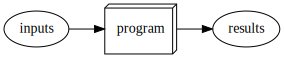

In [7]:
#caption A traditional program
#id basic_program
#alt Pipeline inputs, program, results

gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

Weights are just variables, and a weight assignment is a <u>particular choice of values</u> for those variables. The program's inputs are values that it processes in order to produce its results. The program's weight assignments are other values that <u>define how the program will operate</u>.

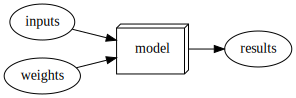

In [8]:
#caption A program using weight assignment
#id weight_assignment

gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

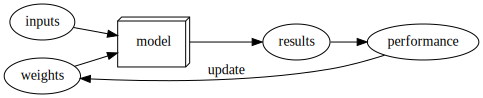

In [9]:
#caption Training a machine learning model
#id training_loop
#alt The basic training loop

gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

Also note that once the model is trained—that is, once we've chosen our final, best, favorite weight assignment—then we can think of the <u>weights as being part of the model</u>, since we're not varying them any more.

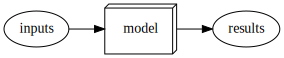

In [11]:
#caption Using a trained model as a program
#id using_model

gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

**Machine Learning:** The training of programs developed by allowing a computer to learn from its experience, rather than through manually coding the individual steps.

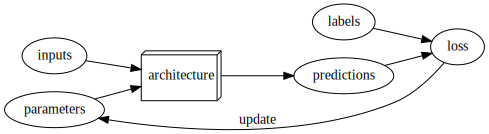

In [3]:
#caption Detailed training loop
#id detailed_loop

gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

In [5]:
path = untar_data(URLs.CAMVID_TINY)

In [6]:
path

Path('/root/.fastai/data/camvid_tiny')

In [7]:
dls = SegmentationDataLoaders.from_label_func(
    path, 
    bs=8, 
    fnames=get_image_files(path/"images"), 
    label_func=lambda o: path/"labels"/f"{o.stem}_P{o.suffix}", 
    codes=np.loadtxt(path/"codes.txt", dtype=str)
)

In [8]:
dls

In [9]:
learn = unet_learner(dls, resnet34)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 159MB/s] 


In [10]:
learn

In [11]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.335196,2.638432,00:02


epoch,train_loss,valid_loss,time
0,2.109642,1.796036,00:01
1,1.811098,1.344664,00:01
2,1.572191,1.180061,00:01
3,1.377609,0.945685,00:01
4,1.210893,0.869374,00:01
5,1.082861,0.785907,00:01
6,0.980075,0.757440,00:01
7,0.900009,0.754735,00:01


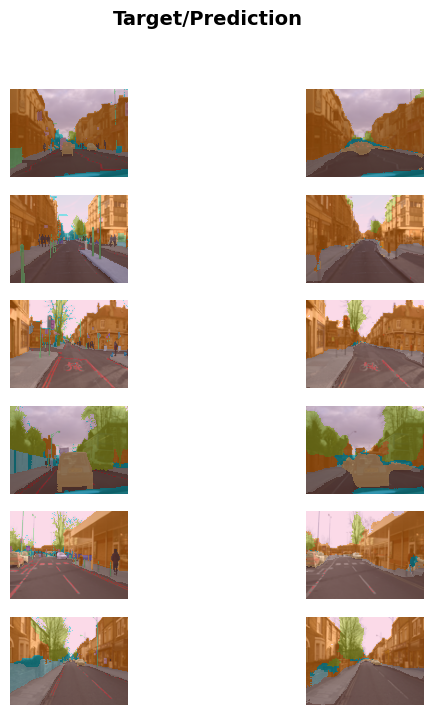

In [12]:
learn.show_results(max_n=6, figsize=(7,8))

In [13]:
from fastai.text.all import *

In [14]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid="test")

In [15]:
dls

In [16]:
learn = text_classifier_learner(
    dls, 
    AWD_LSTM, 
    drop_mult=0.5, 
    metrics=accuracy
)

/usr/local/lib/python3.11/dist-packages/fastai/text/learner.py:149: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  wgts = torch.load(wgts_fname, map_location = lambda storage

In [17]:
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.457523,0.403381,0.817680,03:47


epoch,train_loss,valid_loss,accuracy,time
0,0.310905,0.305765,0.876640,08:11
1,0.247111,0.224720,0.910000,08:11
2,0.188476,0.199403,0.924400,08:11
3,0.144814,0.191605,0.929400,08:10


In [23]:
doc(learn.fine_tune)

In [24]:
??learn.fine_tune

Signature:
learn.fine_tune(
    epochs,
    base_lr=0.002,
    freeze_epochs=1,
    lr_mult=100,
    pct_start=0.3,
    div=5.0,
    *,
    lr_max=None,
    div_final=100000.0,
    wd=None,
    moms=None,
    cbs=None,
    reset_opt=False,
    start_epoch=0,
)
Source:   
@patch
@delegates(Learner.fit_one_cycle)
def fine_tune(self:Learner, epochs, base_lr=2e-3, freeze_epochs=1, lr_mult=100,
              pct_start=0.3, div=5.0, **kwargs):
    "Fine tune with `Learner.freeze` for `freeze_epochs`, then with `Learner.unfreeze` for `epochs`, using discriminative LR."
    self.freeze()
    self.fit_one_cycle(freeze_epochs, slice(base_lr), pct_start=0.99, **kwargs)
    base_lr /= 2
    self.unfreeze()
    self.fit_one_cycle(epochs, slice(base_lr/lr_mult, base_lr), pct_start=pct_start, div=div, **kwargs)
File:      /usr/local/lib/python3.11/dist-packages/fastai/callback/schedule.py
Type:      method


In [25]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([3.9712e-05, 9.9996e-01]))

In [26]:
learn.predict("this is boring")

('pos', tensor(1), tensor([0.2225, 0.7775]))

In [27]:
learn.predict("the movie is boring")

('neg', tensor(0), tensor([0.6441, 0.3559]))

In [28]:
learn.predict("the story is nice, but the actors suck")

('pos', tensor(1), tensor([0.0301, 0.9699]))

In [29]:
learn.predict("the actors suck")

('pos', tensor(1), tensor([0.0135, 0.9865]))

In [5]:
from fastai.tabular.all import *

In [31]:
path = untar_data(URLs.ADULT_SAMPLE)

In [32]:
path

Path('/root/.fastai/data/adult_sample')

In [37]:
%%time
dls = TabularDataLoaders.from_csv(
    path/"adult.csv", 
    path=path, 
    y_names="salary", 
    cat_names=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
    cont_names=['age', 'fnlwgt', 'education-num'],
    procs=[Categorify, FillMissing, Normalize]  # processors
)

CPU times: user 111 ms, sys: 9.97 ms, total: 121 ms
Wall time: 120 ms


/usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


In [6]:
doc(TabularDataLoaders.from_csv)

,Type,Default,Details,
csv,str | Path | io.BufferedReader,,A csv of training data,
skipinitialspace,bool,True,Skip spaces after delimiter,
path,str | Path,.,"Location of `df`, defaults to current working directory",
procs,list,None,List of `TabularProc`s,
cat_names,list,None,Column names pertaining to categorical variables,
cont_names,list,None,Column names pertaining to continuous variables,
y_names,list,None,Names of the dependent variables,
y_block,TransformBlock,None,`TransformBlock` to use for the target(s),
valid_idx,list,None,"List of indices to use for the validation set, defaults to a random split",
bs,int,64,Batch size,


In [7]:
??TabularDataLoaders.from_csv

Signature:
TabularDataLoaders.from_csv(
    csv: 'str | Path | io.BufferedReader',
    skipinitialspace: 'bool' = True,
    *,
    path: 'str | Path' = '.',
    procs: 'list' = None,
    cat_names: 'list' = None,
    cont_names: 'list' = None,
    y_names: 'list' = None,
    y_block: 'TransformBlock' = None,
    valid_idx: 'list' = None,
    bs: 'int' = 64,
    shuffle_train: 'bool' = None,
    shuffle: 'bool' = True,
    val_shuffle: 'bool' = False,
    n: 'int' = None,
    device: 'torch.device' = None,
    drop_last: 'bool' = None,
    val_bs: 'int' = None,
)
Source:   
    @classmethod
    def from_csv(cls, 
        csv:str|Path|io.BufferedReader, # A csv of training data
        skipinitialspace:bool=True, # Skip spaces after delimiter
        **kwargs
    ):
        "Create `TabularDataLoaders` from `csv` file in `path` using `procs`"
        return cls.from_df(pd.read_csv(csv, skipinitialspace=skipinitialspace), **kwargs)
File:      /usr/local/lib/python3.11/dist-packages/fastai

In [38]:
learn = tabular_learner(dls, metrics=accuracy)

In [39]:
learn

In [40]:
%%time
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.379324,0.355702,0.836609,00:04
1,0.353838,0.344589,0.840909,00:04
2,0.351439,0.342594,0.843213,00:04


CPU times: user 12.7 s, sys: 120 ms, total: 12.8 s
Wall time: 12.8 s


In [11]:
doc(Learner.fit_one_cycle)

In [12]:
??Learner.fit_one_cycle

Signature:
Learner.fit_one_cycle(
    self: 'Learner',
    n_epoch,
    lr_max=None,
    div=25.0,
    div_final=100000.0,
    pct_start=0.25,
    wd=None,
    moms=None,
    cbs=None,
    reset_opt=False,
    start_epoch=0,
)
Source:   
@patch
def fit_one_cycle(self:Learner, n_epoch, lr_max=None, div=25., div_final=1e5, pct_start=0.25, wd=None,
                  moms=None, cbs=None, reset_opt=False, start_epoch=0):
    "Fit `self.model` for `n_epoch` using the 1cycle policy."
    if self.opt is None: self.create_opt()
    self.opt.set_hyper('lr', self.lr if lr_max is None else lr_max)
    lr_max = np.array([h['lr'] for h in self.opt.hypers])
    scheds = {'lr': combined_cos(pct_start, lr_max/div, lr_max, lr_max/div_final),
              'mom': combined_cos(pct_start, *(self.moms if moms is None else moms))}
    self.fit(n_epoch, cbs=ParamScheduler(scheds)+L(cbs), reset_opt=reset_opt, wd=wd, start_epoch=start_epoch)
File:      /usr/local/lib/python3.11/dist-packages/fastai/callback/sch

In [41]:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,5.0,12.0,4.0,0.0,4.0,3.0,2.0,-0.708429,10.217388,-0.029575,0.0,0.0
1,6.0,12.0,3.0,5.0,1.0,5.0,1.0,0.024787,1.384507,-0.421827,1.0,1.0
2,5.0,16.0,5.0,7.0,4.0,5.0,1.0,-1.368322,-0.759709,-0.029575,0.0,0.0
3,1.0,2.0,5.0,1.0,5.0,5.0,1.0,1.857825,0.032719,-1.206333,0.0,0.0
4,1.0,16.0,5.0,1.0,4.0,5.0,1.0,-1.148358,0.268107,-0.029575,0.0,0.0
5,5.0,10.0,3.0,11.0,1.0,5.0,1.0,0.391394,1.547213,1.147184,0.0,1.0
6,3.0,13.0,3.0,11.0,1.0,5.0,1.0,0.024787,0.126599,1.539437,1.0,1.0
7,5.0,5.0,6.0,13.0,5.0,3.0,1.0,0.024787,1.039593,-2.775345,0.0,0.0
8,5.0,16.0,5.0,13.0,4.0,5.0,1.0,-1.368322,0.629046,-0.029575,0.0,0.0


In [42]:
from fastai.collab import *

In [43]:
path = untar_data(URLs.ML_SAMPLE)

In [44]:
path

Path('/root/.fastai/data/movie_lens_sample')

In [45]:
%%time
dls = CollabDataLoaders.from_csv(path/"ratings.csv")

CPU times: user 29.3 ms, sys: 1.04 ms, total: 30.4 ms
Wall time: 29 ms


In [46]:
dls

In [48]:
learn = collab_learner(dls, y_range=(0.5, 5.5))

In [49]:
learn

In [50]:
%%time
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.514823,1.311210,00:00


epoch,train_loss,valid_loss,time
0,1.365139,1.254602,00:00
1,1.281362,1.095943,00:00
2,1.060891,0.817915,00:00
3,0.828016,0.687663,00:00
4,0.704098,0.662299,00:00
5,0.650769,0.656713,00:00
6,0.632417,0.652063,00:00
7,0.602420,0.650691,00:00
8,0.638736,0.649732,00:00
9,0.609765,0.649573,00:00


CPU times: user 5.12 s, sys: 140 ms, total: 5.26 s
Wall time: 5.4 s


In [51]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,80.0,27.0,3.0,3.378205
1,34.0,46.0,4.0,3.616133
2,63.0,10.0,2.0,2.666785
3,11.0,97.0,4.0,3.578903
4,49.0,20.0,5.0,4.321943
5,7.0,61.0,4.0,4.258471
6,80.0,45.0,4.0,3.827387
7,69.0,8.0,4.0,4.047575
8,27.0,77.0,5.0,3.869811


In [9]:
doc(Learner.show_results)

In [10]:
??Learner.show_results

Signature:
Learner.show_results(
    self,
    ds_idx=1,
    dl=None,
    max_n=9,
    shuffle=True,
    **kwargs,
)
Docstring: Show some predictions on `ds_idx`-th dataset or `dl`
Source:   
    def show_results(self, ds_idx=1, dl=None, max_n=9, shuffle=True, **kwargs):
        if dl is None: dl = self.dls[ds_idx].new(shuffle=shuffle)
        b = dl.one_batch()
        _,_,preds = self.get_preds(dl=[b], with_decoded=True)
        dl.show_results(b, preds, max_n=max_n, **kwargs)
File:      /usr/local/lib/python3.11/dist-packages/fastai/learner.py
Type:      function
